# Implementation of Gaussian Mixture Model

A gaussian mixture model is a linear superposition of the gaussian distributions, each with their own mean, covariance matrix, and mixing coefficient.Mixture models usually don't require knowing to which cluster or subpopulation a data point may belong to, hence allowing the model to learn the subpopulations automatically. This is a form of unsupervised learning since assignment of each point is unknown.

Gaussian mixture models (GMM) is an extension of the ideas behind k-means. It can also be a powerful tool for estimation beyond just simple clustering. GMM is an improvement to the KMeans clustering. For simple blobs of data, it is easy for KMeans to cluster them and it is usually visible to the naked eyes. KMeans doesnt consider the probability measure or the uncertaininty in the cluster assignment. Usually KMeans have the clusters to be circular. Hence to overcome this shortcomings, GMM  is used which considers the probabilistic model.

2000


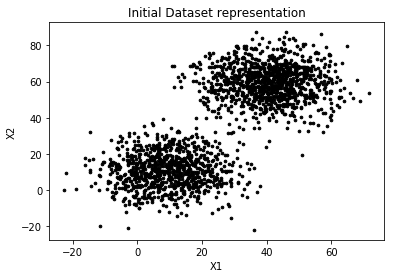

In [3]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm
from sys import maxsize
from matplotlib.patches import Ellipse


data1 = pd.read_csv('dataset.csv')
X = data1['V1'].values
print(X.size)
Y = data1['V2'].values
labels = ([1] * 1000) + ([2] * 1000)
data = {'x': X, 'y': Y,'label':labels}
df = pd.DataFrame(data=data)
plt.scatter(data['x'], data['y'],s=7,c='black')
plt.title('Initial Dataset representation')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

The initial parameters used for the gaussian implementation are taken from the KMeans algorithm. We consider the mean(mu), covariance(cov) and mixing parameter(pi). The probability function is given by - 




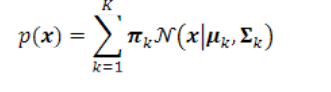

In [4]:
init_params = { 'mu2': [40.6879158,59.60566711],
          'cov2': [ [103.59049046, 0], [0, 95.32143036] ],
          'mu1': [9.50771332,10.64953709],
          'cov1': [ [104.63893395, 0], [0, 97.27679937] ],
          'pi': [0.45, 0.55]
        }


def prob(val, mu, cov, pi):
    p = pi
    for i in range(len(val)):
        p *= norm.pdf(val[i], mu[i], cov[i][i])
    return p



# Expectation-Maximization for Gaussian Mixtures

An expectation–maximization (EM) algorithm is used in Gaussian Mixture Model which is an iterative method to find maximum likelihood. The iterative process has the initial parameter values, and then updates these values using the derived formulas until the algorithm becomes stable(error = 0). The log likelihood function is given by -



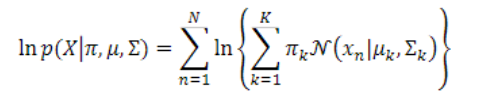

In the Expectation step, we use the current values for the parameters to evaluate the posterior probabilities (responsibilities). We calculate the probabilities of each point being in the two clusters. Whichever has the maximum probability,it is added to the corresponding cluster. 

In [5]:
def expectation_ML(dataFrame, parameters):
    
    for i in range(dataFrame.shape[0]):
        
        x = dataFrame['x'][i]
        y = dataFrame['y'][i]
        
        p_cluster1 = prob([x, y], list(parameters['mu1']), list(parameters['cov1']), parameters['pi'][0] )
        p_cluster2 = prob([x, y], list(parameters['mu2']), list(parameters['cov2']), parameters['pi'][1] )
        
        if p_cluster1 > p_cluster2:
            
            dataFrame['label'][i] = 1
        else:
            dataFrame['label'][i] = 2
            
    return dataFrame

In the Maximization step, these posterior probabilities are used to re-estimate the means, covariances, and mixing coefficients. 

In [6]:

def maximization_UP(clusters, parameters):
    
    points_in_cluster1 = clusters[clusters['label'] == 1]
    points_in_cluster2 = clusters[clusters['label'] == 2]
    pi1 = len(points_in_cluster1) / float(len(clusters))
    pi2 = 1 - pi1
    parameters['pi'] = [pi1, pi2]
    parameters['mu1'] = [points_in_cluster1['x'].mean(), points_in_cluster1['y'].mean()]
    parameters['mu2'] = [points_in_cluster2['x'].mean(), points_in_cluster2['y'].mean()]
    parameters['cov1'] = [ [points_in_cluster1['x'].std(), 0 ], [ 0, points_in_cluster1['y'].std() ] ]
    parameters['cov2'] = [ [points_in_cluster2['x'].std(), 0 ], [ 0, points_in_cluster2['y'].std() ] ]
    
    return parameters


In this method, the distance between the old parameters and the new parameters are calculated. Once when the difference is 0 or negligible, the model become stable. 

In [7]:
def distance(old_params, new_params):
    dist = 0
    for param in ['mu1', 'mu2']:
        for i in range(len(old_params)):
            dist += (old_params[param][i] - new_params[param][i]) ** 2
    return dist ** 0.5

error = maxsize
no_of_iters = 0

df_copy = df.copy()

df_copy['label'] = map(lambda x: x+1, np.random.choice(2, len(df)))
params = pd.DataFrame(init_params)


For a given number of iterations, the clusters are updated with new parameter values and the error between the old and the new parameters are calculated. The error value in each iteration is calculated and the process is continued till the error becomes zero. Once the error becomes zero the model is assumed to become stable. 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


iteration 1, error is 26.0462004438
iteration 2, error is 4.02075659095
iteration 3, error is 3.55273708392
iteration 4, error is 5.03653107348
iteration 5, error is 6.00770310099
iteration 6, error is 5.48459824911
iteration 7, error is 2.17234389067
iteration 8, error is 0.330993263682
iteration 9, error is 0.0604016529366
iteration 10, error is 0.0422952947374
iteration 11, error is 0.0
iteration 12, error is 0.0
The updated parameters are: 

                 cov1                cov2        mu1        mu2      pi
0  [10.3165442543, 0]  [10.1778377034, 0]   9.553736  40.678555  0.4505
1  [0, 9.86159225526]  [0, 9.69146074333]  10.659093  59.642378  0.5495


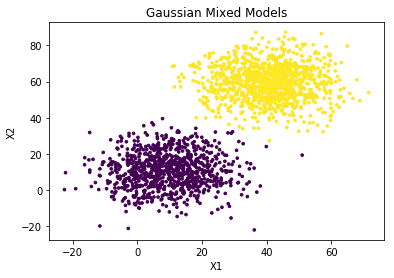

In [8]:
while (no_of_iters<12):
    
    no_of_iters += 1
 
    updated_clusters = expectation_ML(df_copy.copy(), params)

    updated_parameters = maximization_UP(updated_clusters, params.copy())

    error = distance(params, updated_parameters)

    print("iteration {}, error is {}".format(no_of_iters, error))

    df_copy = updated_clusters
    params = updated_parameters

print('The updated parameters are: \n')
print(params)   
plt.scatter(df_copy['x'], df_copy['y'], s=7, c=df_copy['label'])
plt.title('Gaussian Mixed Models')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [83]:
import matplotlib.mlab as mlab
def plot_contours(df_copy, means, covs, title):
    plt.figure()
    plt.scatter(df_copy['x'], df_copy['y'], s=7, c=df_copy['label'])

    delta = 16
    k = len(means)
    x = np.arange(-20,80, delta)
    y = np.arange(-20,80, delta)
    X, Y = np.meshgrid(x, y)
    col = ['r','g','b']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        sigmax = np.sqrt(cov[0][0])
        sigmay = np.sqrt(cov[1][1])
        sigmaxy = cov[0][1]/(sigmax*sigmay)
        Z = mlab.bivariate_normal(X, Y, sigmax, sigmay, mean[0], mean[1], sigmaxy)
        plt.contour(X, Y, Z, colors = col[i])
        plt.title(title)
        plt.xlabel('X1')
        plt.ylabel('Y1')
    #plt.rcParams.update({'font.size':16})
    plt.tight_layout()
    plt.show()

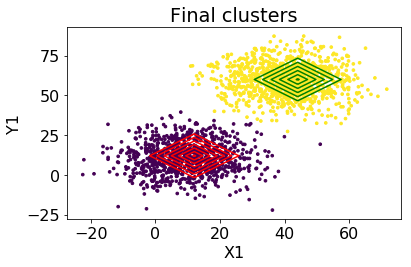

In [84]:
muArr=[]
muArr.append(params['mu1'])
muArr.append(params['mu2'])

covArr=[]
covArr.append(params['cov1'])
covArr.append(params['cov2'])

plot_contours(df_copy, np.asarray(muArr), np.asarray(covArr), 'Final clusters')